### Wesley Matson    



On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.

In [397]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from pandas.tools import plotting
from statsmodels.stats.multicomp import pairwise_tukeyhsd

The motion picture industry is a multibillion dollar industry, with hundreds of movies being made every year.  Some moves have budgets in the hundreds of millions of dollars and can create huge losses if the movie flops at the box office.  Being able to understand the factors that lead to a movie success or failure is very important to the movie industry.  The earlier we can measure the enthusiasm for film, the better for investors in the industry.  Possible early indicators could be:
*  Who is in the film
*  When the film will be released
*  Who the director is
*  Film type (horror, action, ect.)
*  Social media reaction to trailer
*  Social media mentions
*  Google searches    

Once the film is released and people start to watch the movie, an abundant amount of data is created that will be tied to the success of the movie
*  Critic reviews
*  User reviews
*  Social media mentions
*  Movie's facebook page likes
*  Director and Actor facebook likes
*  User votes and ratings
Each piece of data holds a potential clue to how successful the film will be.  It is our goal to analyze the data to be able to predict in the future how successful a movie will do in real time as the data starts to roll in.     

The highest correlated variables in our dataset our:
* Number of user votes
* Number of critic reviews
* Number of user reviews
* Duration
* Movie facebook likes


In [398]:
# import data
df = pd.read_excel("data/movie.xlsx")
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [399]:
#Check correlation
corr = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.410965
num_critic_for_reviews,0.305303
num_user_for_reviews,0.292475
duration,0.261662
movie_facebook_likes,0.247049
gross,0.198021
director_facebook_likes,0.170802
cast_total_facebook_likes,0.085787
actor_2_facebook_likes,0.083808
actor_1_facebook_likes,0.076099


In [400]:
#Drop all columns with less than 0.1 correlation with imbd_ratings, keep budget for further analysis
df = df.drop(['actor_3_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio'], axis=1)

In [401]:
# Check variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 23 columns):
color                      5024 non-null object
director_name              4939 non-null object
num_critic_for_reviews     4993 non-null float64
duration                   5028 non-null float64
director_facebook_likes    4939 non-null float64
actor_2_name               5030 non-null object
actor_1_facebook_likes     5036 non-null float64
gross                      4159 non-null float64
genres                     5043 non-null object
actor_1_name               5036 non-null object
movie_title                5043 non-null object
num_voted_users            5043 non-null int64
actor_3_name               5020 non-null object
plot_keywords              4890 non-null object
movie_imdb_link            5043 non-null object
num_user_for_reviews       5022 non-null float64
language                   5031 non-null object
country                    5038 non-null object
content_rating          

In [402]:
# Drop any duplicate columns
df.drop_duplicates(inplace=True)
df.shape

(4997, 23)

In [403]:
# Get rid of additional unnecessary columns
df=df.drop(['actor_2_name', 'actor_3_name', 'plot_keywords', 'country', 'movie_imdb_link', 'language' ], axis=1)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997 entries, 0 to 5042
Data columns (total 17 columns):
color                      4978 non-null object
director_name              4894 non-null object
num_critic_for_reviews     4948 non-null float64
duration                   4982 non-null float64
director_facebook_likes    4894 non-null float64
actor_1_facebook_likes     4990 non-null float64
gross                      4123 non-null float64
genres                     4997 non-null object
actor_1_name               4990 non-null object
movie_title                4997 non-null object
num_voted_users            4997 non-null int64
num_user_for_reviews       4976 non-null float64
content_rating             4696 non-null object
budget                     4510 non-null float64
title_year                 4890 non-null float64
imdb_score                 4997 non-null float64
movie_facebook_likes       4997 non-null int64
dtypes: float64(9), int64(2), object(6)
memory usage: 702.7+ KB


In [405]:
#Color has 19 missing values, check values and counts
df['color'].value_counts()

Color               4771
 Black and White     207
Name: color, dtype: int64

In [406]:
#Fill null values with most popular value
df = df.fillna({'color' : 'Color'})
df['color'].value_counts()

Color               4790
 Black and White     207
Name: color, dtype: int64

In [407]:
#Check average IMDB score to see if color has any affect
df.groupby('color')['imdb_score'].mean()

color
 Black and White    7.220290
Color               6.407453
Name: imdb_score, dtype: float64

In [408]:
#It would seem color has an effect, change to numerical for further analysis
df['color'] = df['color'].replace({' Black and White': 0, 'Color':1})
df['color'].describe()

count    4997.000000
mean        0.958575
std         0.199291
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: color, dtype: float64

In [409]:
#Drop null values for director name
df = df.dropna(subset=['director_name'])

In [410]:
#Check basic statistics for number of critic reviews
df['num_critic_for_reviews'].describe()

count    4850.000000
mean      142.251753
std       121.517413
min         1.000000
25%        52.000000
50%       112.000000
75%       196.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

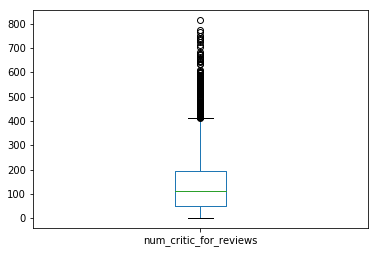

In [411]:
#Check boxplot for distribution shape
df['num_critic_for_reviews'].plot(kind='box')

Majority of number of critic reviews are below 200, distribution is highly skewed left

In [412]:
#Fill the null values with the median, should not have too much impact on correlation analysis
df = df.fillna({'num_critic_for_reviews': 110})

In [413]:
#Check basic statistics for duration
df['duration'].describe()

count    4881.000000
mean      108.149764
std        22.620504
min         7.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       330.000000
Name: duration, dtype: float64

In [414]:
#We need to remove the outlier at 511 with the median
df = df.replace({'duration': 511}, {'duration': 103})

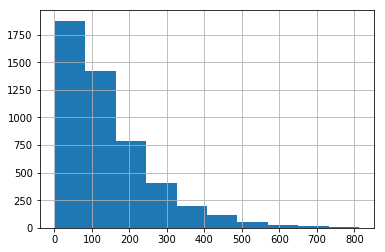

In [415]:
#Check histogram for distribution shape
df['num_critic_for_reviews'].hist()

In [416]:
#Since there are only 15 missing values for duration, we can fill them with the median
df = df.fillna({'duration': df['duration'].median()})

In [417]:
df['num_user_for_reviews'].describe()

count    4875.000000
mean      275.798769
std       380.492996
min         1.000000
25%        67.000000
50%       159.000000
75%       331.000000
max      5060.000000
Name: num_user_for_reviews, dtype: float64

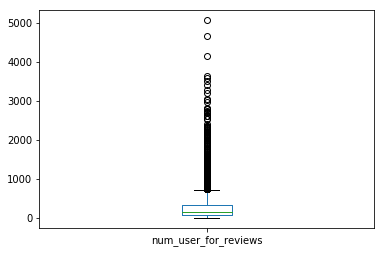

In [418]:
df['num_user_for_reviews'].plot(kind='box')

Significant number of outliers, highly skewed to the left.

In [419]:
#Drop null values for actor name
df = df.dropna(subset=['actor_1_name'])

In [420]:
#There are a significant number of missing values for gross.  To keep the rest of the data, we will replace with the median.
df = df.fillna({'gross': df['gross'].median()})

In [421]:
#There are a significant number of missing values for budget.  To keep the rest of the data, we will replace with the median.
df = df.fillna({'budget': df['budget'].median()})

In [422]:
df['gross'].describe()

count    4.887000e+03
mean     4.480093e+07
std      6.296093e+07
min      1.620000e+02
25%      8.026422e+06
50%      2.550022e+07
75%      5.250147e+07
max      7.605058e+08
Name: gross, dtype: float64

In [423]:
#Remove outlier
df = df.replace({'budget': 1.221550e+10}, {'budget': 2.400000e+07})
df = df.replace({'budget': 4.200000e+09}, {'budget': 2.400000e+07})

In [424]:
#Replace null values in content ranting with unrated.
df = df.fillna({'content_rating': 'Unrated'})

In [425]:
#Check content rating data set
df['content_rating'].value_counts()

R            2098
PG-13        1443
PG            698
Unrated       317
Not Rated     114
G             112
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-G            4
TV-14           3
TV-PG           3
Name: content_rating, dtype: int64

In [426]:
#There are many redundant ratings here, separate into Adult(5), Teen(4), PG(3), G(2), and unrated(1)
df['content_rating'] = df['content_rating'].replace({'R': 5, 'TV-MA': 5, 'X': 5, 'NC-17': 5, 'M': 5})
df['content_rating'] = df['content_rating'].replace({'Not Rated': 1, 'Unrated':1})
df['content_rating'] = df['content_rating'].replace({'PG-13': 4, 'TV-14': 4, 'Approved': 4, 'Passed': 4})
df['content_rating'] = df['content_rating'].replace({'PG': 3, 'GP': 3, 'TV-PG': 3, 'TV-Y7': 3})
df['content_rating'] = df['content_rating'].replace({'G': 2, 'TV-G': 2, 'TV-Y': 2})
df['content_rating'].value_counts()

5    2123
4    1510
3     707
1     431
2     116
Name: content_rating, dtype: int64

In [427]:
#Check to see if content rating has any effect on IMDB score
df.groupby('content_rating')['imdb_score'].mean()

content_rating
1    6.459629
2    6.517241
3    6.299576
4    6.300464
5    6.525436
Name: imdb_score, dtype: float64

In [428]:
#There are some small differences here so we will keep for further analysis
#Create a new column for each content rating for correlation analysis
content_dummies = pd.get_dummies(df['content_rating'], prefix='content_rating')
df = df.join(content_dummies)
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,content_rating,budget,title_year,imdb_score,movie_facebook_likes,content_rating_1,content_rating_2,content_rating_3,content_rating_4,content_rating_5
0,1,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,AvatarÂ,...,4,237000000.0,2009.0,7.9,33000,0,0,0,1,0
1,1,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's EndÂ,...,4,300000000.0,2007.0,7.1,0,0,0,0,1,0


In [429]:
#Drop null values in title year
df = df.dropna(subset=['title_year'])

In [430]:
#Check data quality for title year
df['title_year'].describe()

count    4883.000000
mean     2002.460168
std        12.481966
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

All the values seem reasonable here

In [431]:
#Replace null values in user reviews with the median.
df = df.fillna({'num_user_for_reviews': df['num_user_for_reviews'].median()})

In [432]:
df.isnull().sum()

color                      0
director_name              0
num_critic_for_reviews     0
duration                   0
director_facebook_likes    0
actor_1_facebook_likes     0
gross                      0
genres                     0
actor_1_name               0
movie_title                0
num_voted_users            0
num_user_for_reviews       0
content_rating             0
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
content_rating_1           0
content_rating_2           0
content_rating_3           0
content_rating_4           0
content_rating_5           0
dtype: int64

In [433]:
df.shape

(4883, 22)

After cleaning the data, we have 4883 observations left with no missing values.  We must keep in mind that numerous missing values were filled in budget and gross with the median.

In [434]:
# Check average IMDB score to use as benchmark
df['imdb_score'].mean()

6.415973786606586

The average movie has an IMBD score of 6.44, higher would indicate better than average, lower below average

In [435]:
df['genres'] = df['genres'].str.replace('|', ',')
df['genres'] = df['genres'].str.split(',')
df1 = df['genres'].str.join('|').str.get_dummies()
df1 = df1.drop(['Animation', 'Biography', 'Documentary', 'Film-Noir', 'History', 'Music', 'Musical',
                'News', 'Short', 'Sport', 'War', 'Western'], axis = 1)
df = df.join(df1)
df.drop(['genres'], axis=1)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
0,1,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,AvatarÂ,...,0,0,0,0,1,0,0,0,1,0
1,1,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's EndÂ,...,0,0,0,0,1,0,0,0,0,0
2,1,Sam Mendes,602.0,148.0,0.0,11000.0,200074175.0,"[Action, Adventure, Thriller]",Christoph Waltz,SpectreÂ,...,0,0,0,0,0,0,0,0,0,1
3,1,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,"[Action, Thriller]",Tom Hardy,The Dark Knight RisesÂ,...,0,0,0,0,0,0,0,0,0,1
5,1,Andrew Stanton,462.0,132.0,475.0,640.0,73058679.0,"[Action, Adventure, Sci-Fi]",Daryl Sabara,John CarterÂ,...,0,0,0,0,0,0,0,0,1,0


In [436]:
#Check correlation after cleaning data
corr = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.428369
duration,0.343447
num_critic_for_reviews,0.333486
num_user_for_reviews,0.307823
Drama,0.293840
movie_facebook_likes,0.256474
gross,0.186044
director_facebook_likes,0.172261
content_rating_5,0.086228
actor_1_facebook_likes,0.085148


Duration, number of user votes, number of user reviews, number of critic votes and number of facebook likes are all positively 
correlated to IMDB score.  Also, number of user reviews, number of user votes, number of critic reviews, and movie facebook
likes are extremely well correlated to one another.

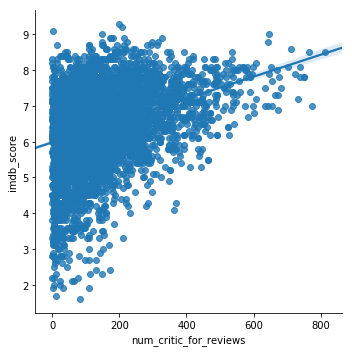

In [437]:
#Now we can check number of critic's reviews.
sns.lmplot('num_critic_for_reviews', 'imdb_score', data=df)

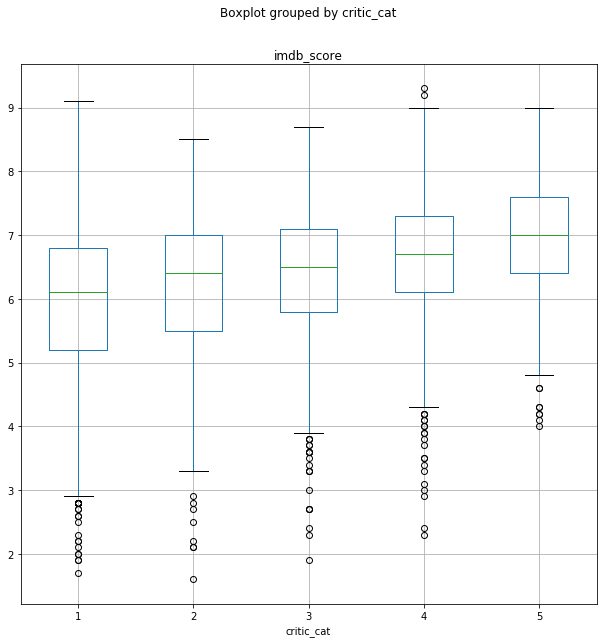

In [438]:
#Divide critic ratings into 5 categories
df['critic_cat']= pd.qcut(df['num_critic_for_reviews'], 5, labels=['1', '2', '3', '4', '5'])
#Show a boxplot of IMDB scores for each category
df.boxplot('imdb_score', by='critic_cat', figsize=(10,10))


Here we can clearly see the whiskers of the boxplot narrow with increased critic reviews.

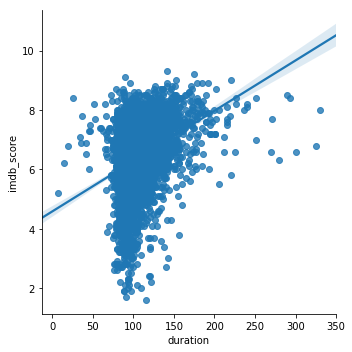

In [439]:
#Check scatter plot for duration and imdb_score
sns.lmplot('duration', 'imdb_score', data=df)

From this scatter plot we can see the linear regression line has a positive slope, 
indicating increased duration has a positive correlation with IMDB scores.  We can also see from the shape of the distribution
that short movies and long movies have higher scores.  The majority of low IMBD scores occur in the middle of the duration range.

In [440]:
#Create score categories to simplify analysis
df['score_cat'] = 'bad'
df.loc[df['imdb_score'] > 4, 'score_cat' ] = 'ok'
df.loc[df['imdb_score'] > 6, 'score_cat' ] = 'good'
df.loc[df['imdb_score'] > 8, 'score_cat' ] = 'excellent'

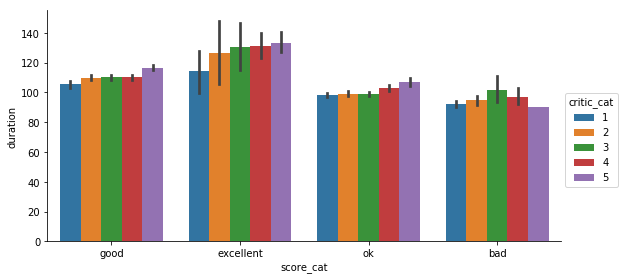

In [441]:
#Check a factor plot with duration with critic and score categories
sns.factorplot("score_cat", "duration", "critic_cat", data=df, kind="bar", aspect=2)

Here we can see the difference in duration within score categories and critic categories

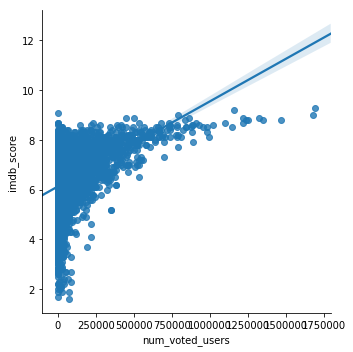

In [442]:
#Check scatter plot for num_voted_users and imdb_score
sns.lmplot('num_voted_users', 'imdb_score', data=df)

This plot is similar to number of critic reviews.  Low range of number of votes by use has a very large range of ratings.
High number of votes has a indicates a high IMDB score

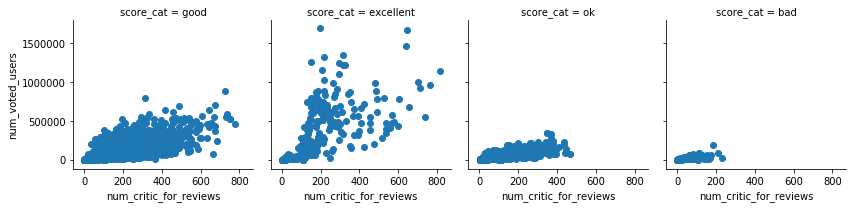

In [443]:
#To see this scatterplot more clearly, we can use a Facet Grid and score categories.  Also we can bring in number of critic reviews.
g = sns.FacetGrid(df, col='score_cat')
g.map(plt.scatter, 'num_critic_for_reviews', 'num_voted_users')

Here we can see the difference in the distributions for low, medium and high rated movies.  Also, the scatter plots show
us the correlation between number of critic and number user votes.

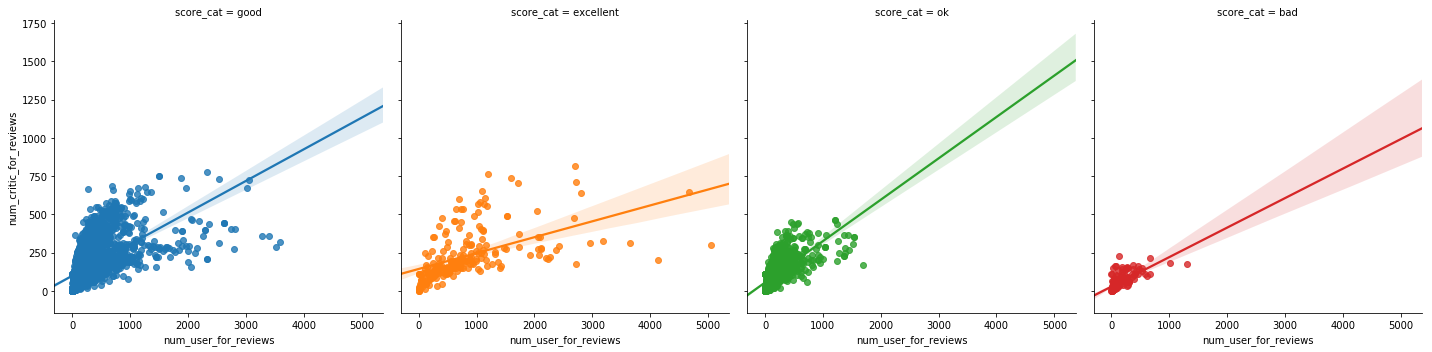

In [444]:
#Scatter plots for number of critic reviews and number of user reviews for each score category
sns.lmplot('num_user_for_reviews', 'num_critic_for_reviews', df, col='score_cat', hue='score_cat')

Here we see a very strong correlation between number of critic reviews and number of user reviews.  The range of user reviews expands nicely as the score category increases.

In [445]:
#Now we can check facebook movie likes
df['movie_facebook_likes'].describe()

count      4883.000000
mean       7565.670285
std       19437.141919
min           0.000000
25%           0.000000
50%         166.000000
75%        3000.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

In [446]:
#We need to remove the outlier and replace with the median
df = df.replace({'movie_facebook_likes': 349000}, {'movie_facebook_likes': 163})

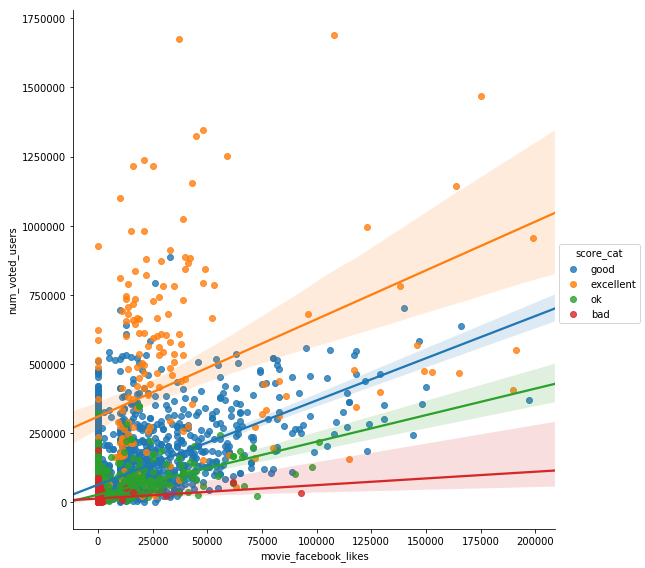

In [447]:
#Check scatterplot for movie facebook likes and user votes
sns.lmplot("movie_facebook_likes", "num_voted_users", df, hue="score_cat", x_jitter=.15, size=8)

Below average movies are more likely to get facebook movie likes than user votes.

In [448]:
#First lets check the 5 most frequent directors
df['director_name'].value_counts().sort_values(ascending=False).head(5)

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
Name: director_name, dtype: int64

In [449]:
#Now lets check the 5 most frequent directors average IMDB scores
steven = df[df['director_name'] == 'Steven Spielberg' ]
woody = df[df['director_name'] == 'Woody Allen' ]
martin = df[df['director_name'] == 'Martin Scorsese' ]
clint = df[df['director_name'] == 'Clint Eastwood' ] 
ridley = df[df['director_name'] == 'Ridley Scott' ] 
top5 = steven.append([woody, martin, clint, ridley])
top5.groupby('director_name')['imdb_score'].mean()

director_name
Clint Eastwood      7.225000
Martin Scorsese     7.660000
Ridley Scott        7.070588
Steven Spielberg    7.480769
Woody Allen         7.009091
Name: imdb_score, dtype: float64

Here we can see that all 5 directors have IMDB score well over the average of 6.44

In [450]:
# Lets check to see if any director in the top 5 is distinguishable from the others
print pairwise_tukeyhsd(top5['imdb_score'], top5['director_name'])

        Multiple Comparison of Means - Tukey HSD,FWER=0.05       
     group1           group2      meandiff  lower   upper  reject
-----------------------------------------------------------------
 Clint Eastwood  Martin Scorsese   0.435   -0.1896  1.0596 False 
 Clint Eastwood    Ridley Scott   -0.1544   -0.806  0.4971 False 
 Clint Eastwood  Steven Spielberg  0.2558  -0.3317  0.8432 False 
 Clint Eastwood    Woody Allen    -0.2159  -0.8261  0.3943 False 
Martin Scorsese    Ridley Scott   -0.5894   -1.241  0.0621 False 
Martin Scorsese  Steven Spielberg -0.1792  -0.7667  0.4082 False 
Martin Scorsese    Woody Allen    -0.6509  -1.2611 -0.0407  True 
  Ridley Scott   Steven Spielberg  0.4102  -0.2059  1.0262 False 
  Ridley Scott     Woody Allen    -0.0615  -0.6993  0.5763 False 
Steven Spielberg   Woody Allen    -0.4717  -1.0438  0.1005 False 
-----------------------------------------------------------------


Only the highest rated director (Martin Scorsese) and lowest rated (Woody Allen) have samples that are statistically different.

In [451]:
#Lets check to see if Steven Spielberg IMDB score is different than the population mean
one_sample = stats.ttest_1samp(steven['imdb_score'], 6.44)
print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The t-statistic is 7.143 and the p-value is 0.000.


In [452]:
#Lets check to see if Woody Allen IMDB score is different than the population mean
one_sample = stats.ttest_1samp(woody['imdb_score'], 6.44)
print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The t-statistic is 5.045 and the p-value is 0.000.


In [453]:
#Lets check to see if Martin Scorsese IMDB score is different than the population mean
one_sample = stats.ttest_1samp(martin['imdb_score'], 6.44)
print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The t-statistic is 9.048 and the p-value is 0.000.


In [454]:
#Lets check to see if Clint Eastwood IMDB score is different than the population mean
one_sample = stats.ttest_1samp(clint['imdb_score'], 6.44)
print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The t-statistic is 5.008 and the p-value is 0.000.


In [455]:
#Lets check to see if Ridley Scott IMDB score is different than the population mean
one_sample = stats.ttest_1samp(ridley['imdb_score'], 6.44)
print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The t-statistic is 2.720 and the p-value is 0.015.


All 5 directors have IMDB score that are statistically significant from the mean of the dataset of 6.44.

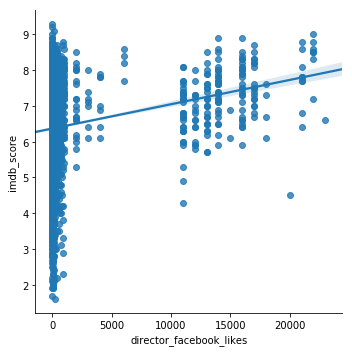

In [456]:
sns.lmplot('director_facebook_likes', 'imdb_score', data=df)

Very few below average movies have directors with significant facebook likes.

In [457]:
#Now we can check top actor IMDB scores and actor likes
#Check the IMDB score for the top 5 most frequent actors
df['actor_1_name'].value_counts().sort_values(ascending=False).head(5)

Robert De Niro    49
Johnny Depp       40
Nicolas Cage      32
J.K. Simmons      31
Matt Damon        30
Name: actor_1_name, dtype: int64

In [458]:
#Now find the average IMDB score for the most frequent actors
robert = df[df['actor_1_name'] == 'Robert De Niro' ]
johnny = df[df['actor_1_name'] == 'Johnny Depp' ]
nicolas = df[df['actor_1_name'] == 'Nicolas Cage' ]
kj = df[df['actor_1_name'] == 'J.K. Simmons' ] 
denzel = df[df['actor_1_name'] == 'Denzel Washington' ] 
top5act = robert.append([johnny, nicolas, kj, denzel])
top5act.groupby('actor_1_name')['imdb_score'].mean()

actor_1_name
Denzel Washington    7.083333
J.K. Simmons         6.674194
Johnny Depp          6.735000
Nicolas Cage         6.212500
Robert De Niro       6.746939
Name: imdb_score, dtype: float64

Note that Nicolas Cage as below average rating, and some others are close.  Denzel Washington has a strong rating of 7.08

In [459]:
#Check to see if there is significant difference between actors
print pairwise_tukeyhsd(top5act['imdb_score'], top5act['actor_1_name'])

       Multiple Comparison of Means - Tukey HSD,FWER=0.05       
      group1          group2     meandiff  lower   upper  reject
----------------------------------------------------------------
Denzel Washington  J.K. Simmons  -0.4091  -1.0425  0.2242 False 
Denzel Washington  Johnny Depp   -0.3483  -0.9456  0.2489 False 
Denzel Washington  Nicolas Cage  -0.8708  -1.4993 -0.2424  True 
Denzel Washington Robert De Niro -0.3364  -0.9097  0.2369 False 
   J.K. Simmons    Johnny Depp    0.0608  -0.5309  0.6525 False 
   J.K. Simmons    Nicolas Cage  -0.4617  -1.0849  0.1615 False 
   J.K. Simmons   Robert De Niro  0.0727  -0.4948  0.6403 False 
   Johnny Depp     Nicolas Cage  -0.5225   -1.109  0.064  False 
   Johnny Depp    Robert De Niro  0.0119   -0.515  0.5389 False 
   Nicolas Cage   Robert De Niro  0.5344  -0.0276  1.0965 False 
----------------------------------------------------------------


Again the only significant difference is between the highest rated (Denzel Washington) and lowest rated (Nicholas Cage)

In [460]:
#Lets check to see if Denzel Washington IMDB score is different than the population mean
one_sample = stats.ttest_1samp(denzel['imdb_score'], 6.44)
print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The t-statistic is 5.970 and the p-value is 0.000.


In [461]:
#Lets check to see if K.J. Simon IMDB score is different than the population mean
one_sample = stats.ttest_1samp(kj['imdb_score'], 6.44)
print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The t-statistic is 1.733 and the p-value is 0.093.


In [462]:
#Lets check to see if Jonny Depp IMDB score is different than the population mean
one_sample = stats.ttest_1samp(johnny['imdb_score'], 6.44)
print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The t-statistic is 2.089 and the p-value is 0.043.


In [463]:
#Lets check to see if Nicolas Cage IMDB score is different than the population mean
one_sample = stats.ttest_1samp(nicolas['imdb_score'], 6.44)
print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The t-statistic is -1.290 and the p-value is 0.206.


In [464]:
#Lets check to see if Robert De Niro IMDB score is different than the population mean
one_sample = stats.ttest_1samp(robert['imdb_score'], 6.44)
print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The t-statistic is 2.036 and the p-value is 0.047.


J.K. Simmons and Nicolas Cage fail to produce better than average movies, despite being in the top 5 most frequent 
leading actor.

In [465]:
#Lets compare most frequent actor facebook likes to the average.
overall_facea = df['actor_1_facebook_likes']
top5_facea = top5act['actor_1_facebook_likes']
two_sample = stats.ttest_ind(overall_facea, top5_facea)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -15.165 and the p-value is 0.000.


The top 5 most frequent actors have more facebook likes than the average leading actor.

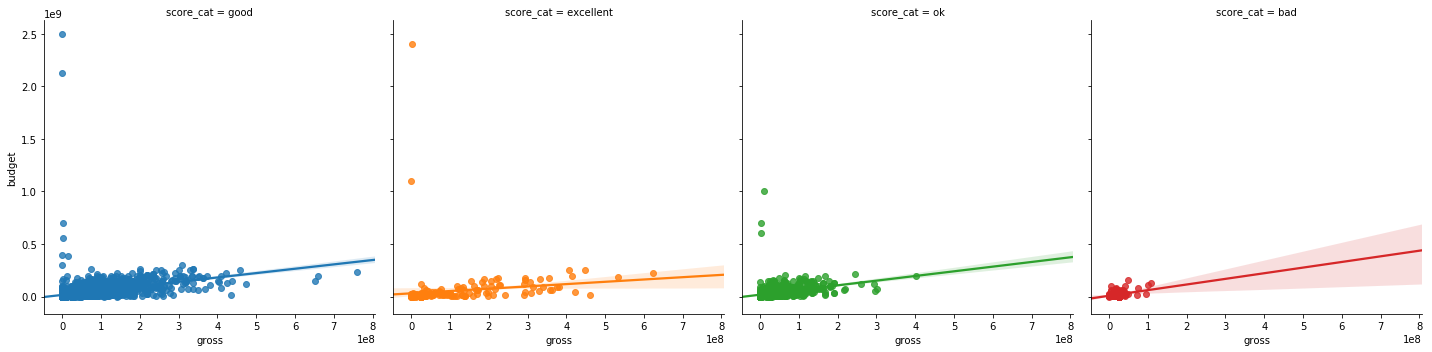

In [466]:
#Scatter plots for gross and budget for each score category.
sns.lmplot('gross', 'budget', df, col='score_cat', hue='score_cat')

From this plot we can see that it is rare to have a high grossing move that is average or low scoring.  Also we can see that 
there are several high budget movies that failed to produce any meaning returns.

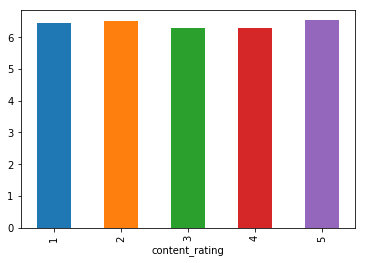

In [467]:
#Check average IMDB score for each rating category
df.groupby('content_rating')['imdb_score'].mean().plot(kind='bar')

All ratings have very similar average IMDB scores.  Also note that all content ratings had low correlation with IMDB scores.

In [468]:
#Finally, lets check to see if the difference in ratings are statistically significant.
print pairwise_tukeyhsd(df['imdb_score'], df['content_rating'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2     0.0718   -0.245 0.3886 False 
  1      3    -0.1459  -0.3313 0.0396 False 
  1      4     -0.145  -0.3108 0.0209 False 
  1      5      0.08   -0.0805 0.2405 False 
  2      3    -0.2177  -0.5207 0.0854 False 
  2      4    -0.2168  -0.5083 0.0747 False 
  2      5     0.0082  -0.2803 0.2967 False 
  3      4     0.0009   -0.137 0.1388 False 
  3      5     0.2259   0.0945 0.3572  True 
  4      5     0.225    0.1231 0.3268  True 
--------------------------------------------


Non-rated and R rated movies have the highest scores and they are statistically different than PG and PG-13 rated movies.

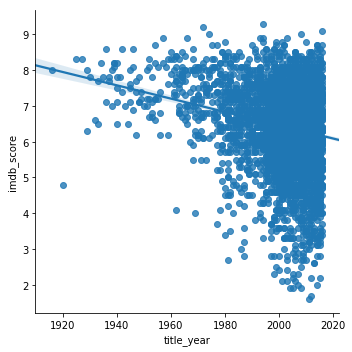

In [469]:
#Now we can check title year
sns.lmplot('title_year', 'imdb_score', data=df)

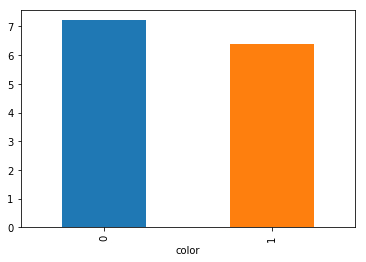

In [470]:
#Check the effect of color on IMDB score
df.groupby('color')['imdb_score'].mean().plot(kind='bar')

In [471]:
#Run a t-test to see if there is a significant difference between average IMDB scores
baw = df[df['color'] == 0]['imdb_score']
col = df[df['color'] == 1]['imdb_score']
two_sample = stats.ttest_ind(baw, col)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is 10.518 and the p-value is 0.000.


We can see there is a clear statistical difference between the movies in color and black and white.  Since the average score
for movies in black and white is higher, we can conclude that black and white movies have a higher IMDB score.

In [472]:
#Now we run regression models
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [473]:
df['title_year1'] = df['title_year'] - 2000

In [474]:
df.describe()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,content_rating,budget,...,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller,title_year1
count,4883.000000,4883.000000,4883.000000,4883.000000,4883.000000,4.883000e+03,4.883000e+03,4883.000000,4883.000000,4.883000e+03,...,4883.000000,4883.000000,4883.000000,4883.000000,4883.000000,4883.000000,4883.000000,4883.000000,4883.000000,4883.000000
mean,0.958222,142.153185,108.192709,690.293877,6671.357977,4.481674e+07,8.478898e+04,275.794593,3.980135,3.493438e+07,...,0.174278,0.510956,0.108949,0.120827,0.112431,0.095843,0.221176,0.121647,0.280156,2.460168
std,0.200101,121.055111,22.557268,2824.926155,15198.107123,6.298429e+07,1.392749e+05,380.115460,1.208928,7.526290e+07,...,0.379387,0.499931,0.311608,0.325960,0.315928,0.294406,0.415081,0.326911,0.449121,12.481966
min,0.000000,1.000000,7.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,1.000000,1.000000,2.180000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-84.000000
25%,1.000000,53.000000,94.000000,7.000000,618.000000,8.012936e+06,8.993000e+03,68.000000,3.000000,7.000000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,111.000000,104.000000,49.000000,991.000000,2.550022e+07,3.498500e+04,159.000000,4.000000,2.000000e+07,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,196.000000,118.000000,194.000000,11000.000000,5.253598e+07,9.788800e+04,330.000000,5.000000,4.000000e+07,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
max,1.000000,813.000000,330.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,5060.000000,5.000000,2.500000e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000


In [475]:
#First we will run a regression model with top 4 correlated variables
y = df['imdb_score']
X = df[['num_user_for_reviews', 'duration', 'num_critic_for_reviews', 'num_voted_users']]

In [476]:
#Create regression model
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [477]:
#Check intercept and coefficients
print "y-intercept ", model1.intercept_
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

y-intercept  4.86530805803252


,0,1
0,num_user_for_reviews,-0.000538
1,duration,0.011573
2,num_critic_for_reviews,0.001159
3,num_voted_users,0.000003


In [478]:
# 24.4% of variation is explained by the model
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.936702391958306
variance or r-squared:  0.24433451401509443


This model is not the best.  Coefficients are very close to 0, and the model only explains 24.4% of variation.

In [479]:
#Run lasso regression to penalize for extra variables, check entire dataset
X = df[['color', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes', 
        'gross', 'num_voted_users', 'num_user_for_reviews', 'budget', 'title_year1', 'movie_facebook_likes', 
        'content_rating_1', 'content_rating_2', 'content_rating_3', 'content_rating_4', 'content_rating_5', 
        'Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 
        'Sci-Fi', 'Thriller']]
model1 = linear_model.Lasso(alpha=1)             
model1.fit(X, y)
model1_y = model1.predict(X)

In [480]:
print "y-intercept ", model1.intercept_
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

y-intercept  5.213858621723807


,0,1
0,color,-0.000000e+00
1,num_critic_for_reviews,2.148245e-03
2,duration,8.242392e-03
3,director_facebook_likes,5.104653e-06
4,actor_1_facebook_likes,3.293898e-07
5,gross,-2.586599e-09
6,num_voted_users,3.806334e-06
7,num_user_for_reviews,-5.012027e-04
8,budget,-5.775077e-10
9,title_year1,-1.473684e-02


Here are the results from lasso regression.  All the binary columns have 0 coefficients.  Title year, number of critic reviews, duration, number of user reviews and number of user votes have the largest coefficients.

In [481]:
#Show MSE and R^2
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.8583571133189194
variance or r-squared:  0.30753796429547986


R^2 value is still pretty small, even with all the variables in the dataset.

In [482]:
#Choose only variables with largest coeffients 
runs_reg_model = ols("imdb_score~duration+title_year1+num_critic_for_reviews+num_voted_users",df)
runs_reg = runs_reg_model.fit()
print runs_reg.summary()

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     481.4
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:23:40   Log-Likelihood:                -6640.7
No. Observations:                4883   AIC:                         1.329e+04
Df Residuals:                    4878   BIC:                         1.332e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

This is our best regression model.  With number of critic reviews, duration, title year, and number of user votes R squared is comparable to the full model and all coefficients are significant.

In [483]:
#Now we can build a classification model

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
import scikitplot as skplt

#stats testing
import scipy.stats as stats

#Random Forest ensembel
from sklearn.ensemble import RandomForestClassifier

In [484]:
# declare X variables and y variable
y = df['score_cat']
X = df.drop(['imdb_score', 'director_name', 'genres', 'actor_1_name', 'movie_title', 
             'content_rating', 'critic_cat', 'score_cat', 'title_year1'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [485]:
#Now run random forest classifier for Feature selection
clf = RandomForestClassifier(n_estimators=20)    
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7501706484641638

In [486]:
#Check variable importance for cluster analysis
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).sort_values('importance', ascending=False).head(10)

,feature,importance
6,num_voted_users,0.133424
2,duration,0.094169
1,num_critic_for_reviews,0.084988
7,num_user_for_reviews,0.083937
8,budget,0.078917
9,title_year,0.075696
5,gross,0.072595
4,actor_1_facebook_likes,0.070333
3,director_facebook_likes,0.061834
10,movie_facebook_likes,0.061025


Here are the 10 most important variables for cluster analysis.

In [487]:
# Use extra trees classifier to select the most important columns
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0034, 'content_rating_2'), (0.0075, u'color'), (0.009, 'content_rating_1'), (0.0096, 'content_rating_3'), (0.0101, u'Family'), (0.0114, u'Mystery'), (0.013, 'content_rating_5'), (0.0133, u'Sci-Fi'), (0.0138, 'content_rating_4'), (0.0155, u'Fantasy'), (0.0156, u'Adventure'), (0.0159, u'Crime'), (0.019, u'Action'), (0.0194, u'Romance'), (0.0206, u'Comedy'), (0.0229, u'Thriller'), (0.0256, u'Horror'), (0.042, u'Drama'), (0.0559, u'actor_1_facebook_likes'), (0.0564, u'director_facebook_likes'), (0.0603, u'gross'), (0.0608, u'movie_facebook_likes'), (0.0633, u'duration'), (0.0694, u'budget'), (0.07, u'num_user_for_reviews'), (0.075, u'title_year'), (0.0805, u'num_critic_for_reviews'), (0.121, u'num_voted_users')]


Extra Tees Classifier selects number of user votes, number of user reviews, number of critic reviews, title year, and budget as the top 5 most important variables

In [488]:
#Use select K best to find the 5 best columns to use:
X_select = SelectKBest(chi2, k=5).fit_transform(X, y)
selector = SelectKBest(chi2, k=5).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print idxs_selected

[ 3  5  6  8 10]


Select best K selects director facebook likes, gross, number of user votes, budget, and movie facebook likes as best columns.

In [489]:
#Choose the 5 best variables from feature selection
X_etc = df[['num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'budget', 'duration']]
X_train, X_test, y_train, y_test = train_test_split(X_etc, y, test_size=0.3, random_state=1)

#Now run random forest classifier with these 5
clf1 = RandomForestClassifier(n_estimators=20)    
clf1=clf1.fit(X_train, y_train)

0.7071672354948806

In [510]:
# Model evaluation
print metrics.accuracy_score(y_test, clf1.predict(X_test))
print metrics.confusion_matrix(y_test, clf1.predict(X_test)) 
print metrics.classification_report(y_test, clf1.predict(X_test))

0.7071672354948806
[[  2   0  20  23]
 [  0  42  34   0]
 [  3   9 810 136]
 [  6   0 198 182]]
             precision    recall  f1-score   support

        bad       0.18      0.04      0.07        45
  excellent       0.82      0.55      0.66        76
       good       0.76      0.85      0.80       958
         ok       0.53      0.47      0.50       386

avg / total       0.69      0.71      0.69      1465



The random forest classifier has a solid accuracy score of 70.7%.

In [490]:
# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [491]:
# Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print metrics.classification_report(y_test, dt.predict(X_test))

0.6976109215017064
[[  0   0  36   9]
 [  0  31  45   0]
 [  0   6 906  46]
 [  0   0 301  85]]
             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        45
  excellent       0.84      0.41      0.55        76
       good       0.70      0.95      0.81       958
         ok       0.61      0.22      0.32       386

avg / total       0.66      0.70      0.64      1465



C:\Users\aliso\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model does an ok job predicting movie score category with a accuracy score of 69.7%.  This model did a poor job of predicting bad movies, and a good job of predicting excellent movies.

In [492]:
tree.export_graphviz(dt, out_file='data/hrtree1.dot', feature_names=X_etc.columns)

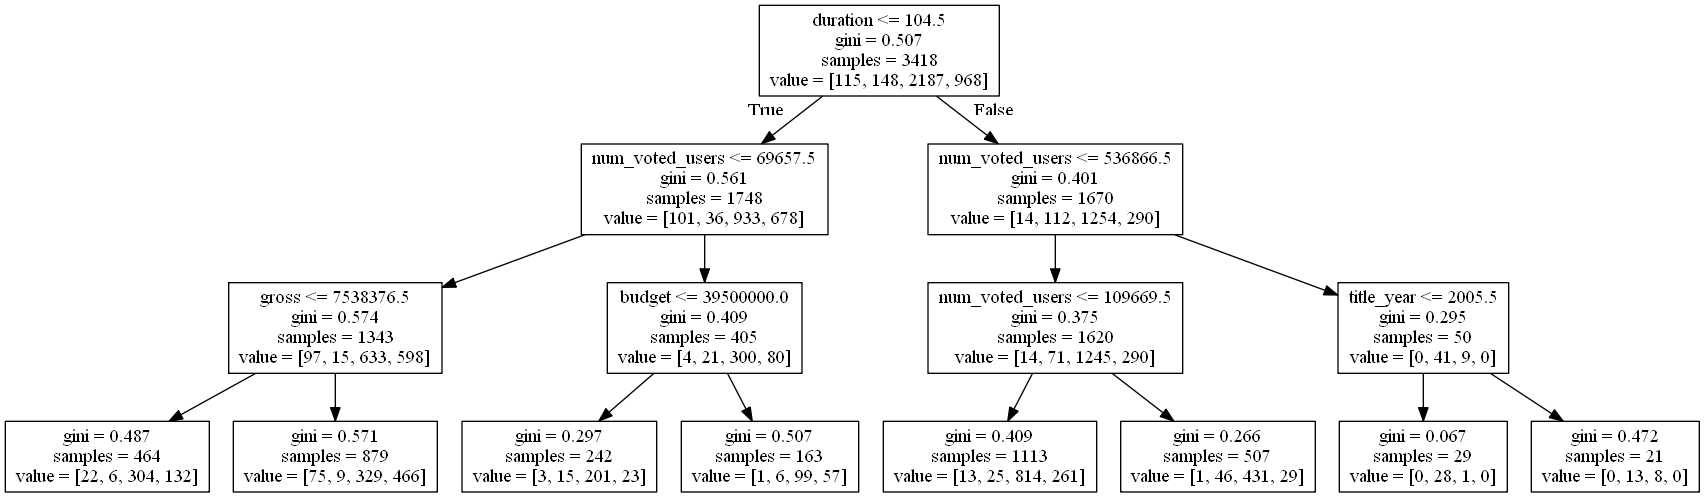

In [493]:
from IPython.display import Image
Image("data/hrtree1.png")

Duration and number of users voted seem to be the most important in the decision tree.

In [494]:
# initialize KNeighborsClassifier() and train a KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [495]:
# Model evaluation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))

0.6122866894197952
[[  1   0  26  18]
 [  0   9  61   6]
 [ 10   6 754 188]
 [ 13   1 239 133]]
             precision    recall  f1-score   support

        bad       0.04      0.02      0.03        45
  excellent       0.56      0.12      0.20        76
       good       0.70      0.79      0.74       958
         ok       0.39      0.34      0.36       386

avg / total       0.59      0.61      0.59      1465



The Knn model is slightly worse at predicting movies scores, with an accuracy score of 61.2%.  This model did best at predicting good movies.

In [496]:
# evaluate the random forest model using 10-fold cross-validation
scores = cross_val_score(clf1, X_etc, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.6877551  0.70204082 0.7122449  0.7402863  0.69262295 0.66188525
 0.63729508 0.62422998 0.59958932 0.52057613]
0.6578525827118853


The cross validation score of 65.8% give use confidence that this is our best classification model.

In [497]:
#Now we switch to cluster analysis

#Import packages
from sklearn import tree
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [498]:
# normalize data
X_new = (X - X.mean()) / (X.max() - X.min())
X_new.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,num_user_for_reviews,budget,title_year,...,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
0,0.041778,0.715329,0.216122,-0.030013,-0.008861,0.941070,0.474278,0.549161,0.080826,0.065398,...,-0.373541,-0.174278,-0.510956,-0.108949,0.879173,-0.112431,-0.095843,-0.221176,0.878353,-0.280156
1,0.041778,0.196856,0.188258,-0.005535,0.052076,0.347910,0.228690,0.190197,0.106026,0.045398,...,-0.373541,-0.174278,-0.510956,-0.108949,0.879173,-0.112431,-0.095843,-0.221176,-0.121647,-0.280156
2,0.041778,0.566314,0.123242,-0.030013,0.006764,0.204150,0.113081,0.141966,0.084026,0.125398,...,-0.373541,-0.174278,-0.510956,-0.108949,-0.120827,-0.112431,-0.095843,-0.221176,-0.121647,0.719844
3,0.041778,0.826166,0.172778,0.926509,0.031764,0.530323,0.627041,0.479384,0.086026,0.095398,...,-0.373541,-0.174278,-0.510956,-0.108949,-0.120827,-0.112431,-0.095843,-0.221176,-0.121647,0.719844
5,0.041778,0.393900,0.073707,-0.009361,-0.009424,0.037136,0.075404,0.091363,0.091506,0.095398,...,-0.373541,-0.174278,-0.510956,-0.108949,-0.120827,-0.112431,-0.095843,-0.221176,0.878353,-0.280156


In [499]:
#Check variance after normalization
X_new.var()

color                      0.040040
num_critic_for_reviews     0.022226
duration                   0.004877
director_facebook_likes    0.015085
actor_1_facebook_likes     0.000564
gross                      0.006859
num_voted_users            0.006794
num_user_for_reviews       0.005645
budget                     0.000906
title_year                 0.015580
movie_facebook_likes       0.008937
content_rating_1           0.079816
content_rating_2           0.023196
content_rating_3           0.123850
content_rating_4           0.213653
content_rating_5           0.245796
Action                     0.177237
Adventure                  0.150889
Comedy                     0.234056
Crime                      0.143935
Drama                      0.249931
Family                     0.097099
Fantasy                    0.106250
Horror                     0.099811
Mystery                    0.086675
Romance                    0.172292
Sci-Fi                     0.106871
Thriller                   0

In [500]:
#Now we can check for the optimal value of k
tests = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20]

for k in tests:
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(X_new)
    labels = kmeans_model.labels_
    print metrics.silhouette_score(X_new, labels, metric='euclidean')

0.1518566051322317
0.18541933814326444
0.16098969605787736
0.1711948064801309
0.17084646545787846
0.1791283925476745
0.1857951704775322
0.18559198384394066
0.19800508988103316
0.19453516485979486
0.205411709274622
0.2146281039891564


Here we will choose to use 2 clusters for further analysis.

In [511]:
#Initialize Kmeans model
k_means = KMeans(init='k-means++', n_clusters=2, random_state=1)
k_means.fit(X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [512]:
#Create a cluster column for cluster profiling
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)
df2 = df.join(df1)

In [513]:
# Check the number of observations in each cluster
df2['cluster'].value_counts()

0    2742
1    2141
Name: cluster, dtype: int64

In [504]:
# Check mean values for each cluster
df2[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'imdb_score', 
     'cluster','gross', 'num_voted_users', 'num_user_for_reviews' ]].groupby(['cluster']).mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,imdb_score,gross,num_voted_users,num_user_for_reviews
cluster,,,,,,,,
0,150.184493,108.596917,743.047174,6760.951892,6.520598,2.920737e+07,87421.984587,286.983185
1,135.882203,107.877097,649.103209,6601.401532,6.334282,5.700479e+07,82733.085704,267.058352


Here we can see that cluster 0 movies have slightly more critic reviews, director facebook likes, actor 1 facebook likes, user votes and reviews along with higher IMDB scores.

In [505]:
#Check genres for each cluster
df2[['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'cluster','Family', 'Fantasy', 'Horror', 
     'Mystery', 'Romance', 'Sci-Fi', 'Thriller' ]].groupby(['cluster']).mean()

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
cluster,,,,,,,,,,,,
0,0.214853,0.068192,0.322279,0.272770,0.587109,0.001401,0.057917,0.168146,0.131247,0.178888,0.088744,0.385801
1,0.242159,0.276441,0.413567,0.097374,0.451495,0.192925,0.169949,0.068928,0.068198,0.254194,0.147338,0.197666


Cluster 1 has most adventure, comedy, family, fantasy, romance and sci-fi movies while cluster 0 has the most crime, drama, horror and thriller

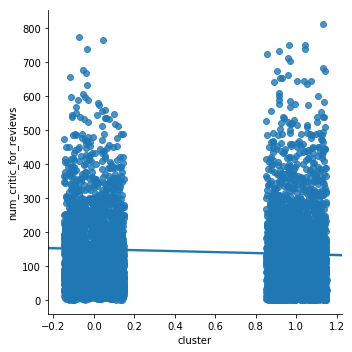

In [506]:
#Check scatterplot with cluster and number of critic reviews
sns.lmplot("cluster", "num_critic_for_reviews", df2, x_jitter=.15, y_jitter=.15)

In this scatterplot we can that cluster 0 has move critic reviews, on average.

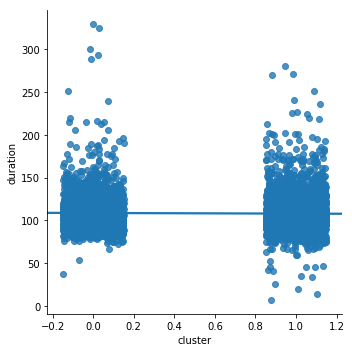

In [507]:
#Check scatterplot for cluster and duration
sns.lmplot("cluster", "duration", df2, x_jitter=.15, y_jitter=.15)

Duration is not an important factor between clusters.

Text(0.5,0,'Actor Facebook likes')

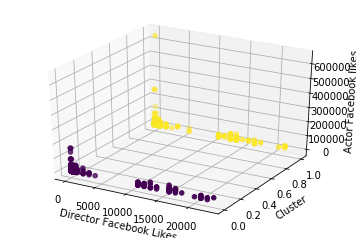

In [508]:
#Try a 3d plot with director and actor facebook likes with cluster
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df2['director_facebook_likes']
y = df2['cluster']
z = df2['actor_1_facebook_likes'] 
colors = df2['cluster']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('Director Facebook Likes')
ax.set_ylabel('Cluster')
ax.set_zlabel('Actor Facebook likes')

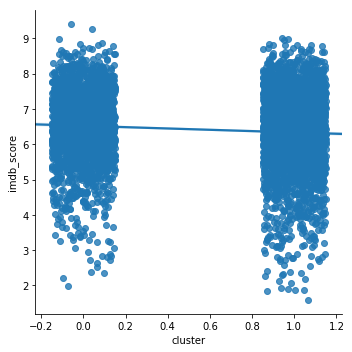

In [509]:
#Check scatterplot with cluster and IMDB score
sns.lmplot("cluster", "imdb_score", df2, x_jitter=.15, y_jitter=.15)

Cluster 0 has slightly higher IMDB scores than cluster 1

From analyzing this dataset we are able to gain some insight into some of the attributes of movies that score highly IMDB.
*  Movie duration
    *  The longer a the move, the higher average IMDB score
    *  Most low scoring movies occur in the middle range of duration
*  Number of critic reviews
    *  As the number of critic reviews increase, so does the average IMDB score
    *  As the number of critic reviews increase, the range of scores decreases, eliminating the lowest scores
    *  A movie with numerous critic reviews is unlikely to get a low IMDB score
*  Number of user votes
    *  The more user votes a movie gets, the higher the average IMDB score
    *  The movies with numerous user votes are unlikely to get low or average IMDB scores
*  Number of user reviews
    *  The more user reviews a movie gets, the higher the average IMDB score
    *  It is rare for a low scoring movie to receive numerous user reviews
*  Movie facebook likes
    *  The more facebook movie likes, the higher the average IMDB score.
    *  Low rated movies are more likely to get facebook likes than user votes.   
    
Number of critic reviews, number of user reviews, number of facebook likes and number of user votes are very highly correlated to one another.  
*  Directors
    *  The 5 most frequent directors have statistically higher IMDB scores than the average movie
    *  The 5 most frequent directors have statistically similar IMDB scores.
*  Actors
    *  Not all 5 of the most frequent actors produced statically significant IMDB scores compared to the mean.
    *  The 5 most frequent actors had statistically similar IMDB scores.    
    
This analysis would imply that the director is more important than leading actor for high IMDB scores.
*  Gross
    *  The more money a movie gross, the higher the average IMDB score
    *  A low scoring movie is unlikely to have a high gross
*  Content rating
    *  All ratings had very similar average IMDB scores
    *  R and non-rated were statistically higher than PG and PG-13   
    
Modeling is the best way to identify the best variables for predicting the next round of successful movies
* Regression Analysis
    *  The regression model with variables number of critic reviews, duration, title year, number of user reviews and number of user votes accounted for 29.8% of the variation in IMDB scores.
    *  Metrics indiate that regression model would be a poor choice for future predictions.
* Feature Selection
    *  Random forest classifier, select K best, and extra trees classifier were used to select number of user votes, number of user reviews, number of critic reviews, budget, and duration as the 5 best varaibles for classification models.
* Decision Tree Clasifier
    *  Duration, number of user votes, gross, budget and title year are all used in the decision tree.
    *  The decision tree had a 70.7% accuracy score predicting movies as bad, ok, good, or excellent.
* Knn nearest neighbor
    *  Knn nearest neighbor had a 69.8% accuracy score predicting movies as bad, ok, good, or excellent.
* Random forest Classifier
    *  The decision Tree Classifier had the highest accuracy score of 73.2% predicting movies as bad, ok, good, or excellent.
    *  Our confidence that this is the best classifier model is increased by a cross validation score of 65.9%.
* K-means Cluster analysis
    *  The optimal number of clusters was found to be 2
    *  Cluster 0 contained higher average IMDB score movies as well as more critic reviews, more director facebook likes, more actor 1 facebook likes, more user votes and reviews.
    *  Cluster 0 contained a higher proportion of crime, drama, horror and thriller movies.
    *  Cluster 1 contained a higher proportion of adventure, comedy, family, fantasy, romance and sci-fi movies.
* Feature selection with random Forest Classifier
    *  The most important variables for cluster analysis are number of user votes, duration, number of critic and user reviews and title year.
    
Overall the best prediction model was the Decision Tree Classifier.  The most important variables appearing in multiply models are number of user votes, number of critic reviews and number of user reviews.  In order to consistently produce movies that achieve good and excellent IMDB scores, these metrics need to be maximized.


    